# Define subtargets

The BluePy / SNAP API allows us to define targets of cells in a circuit.
These targets are parameterized by circuit properties that were specified as
input to the circuit build.
For example, we can specify a circuit region as a target to obtain all the cells
in that region.
We might want to further subset such a target over the circuit's emergent properties
that were not set as input.
For example, subtargets defined by the columnar architecture in the cortex.

The circuit's atlas' voxels have been mapped to a 2D plane, which we call as the cifcuit's
/flatmap/. In this notebook we present our definition of flatmap based subtargets.
Such subtargets are comparable to hexagonal microcircuit columns that have been studied in
the past.

## Data and code

Load the needed data and code

In [1]:
#load tools to compose an article of analysis.
import os
import importlib
from importlib import reload
from pathlib import Path
import logging

from bluepy import Circuit, Cell

import pandas as pd
import numpy as np
from scipy import sparse
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sbn
proj83 = Path("/gpfs/bbp.cscs.ch/project/proj83")
path_results = (proj83 
                /"home/sood/analyses/manuscript/topological-analysis-subvolumes"
                /"notebooks" / "results")
path_config = path_results / "develop-config.json"

from connsense.io import read_config
from connsense.io import logging
from connsense.subtargets import define as define_subtargets

path_circuit = "/gpfs/bbp.cscs.ch/project/proj83/circuits/Bio_M/20200805/"
circuit = Circuit(path_circuit + "CircuitConfig_TC_WM")

LOG = logging.get_logger("Discuss how to define circuit subtargets..")

LOG.info("A tutorial to define subtargets.")

2021-11-07 22:12:04 INFO     A tutorial to define subtargets.


In [2]:
import connsense.subtargets as define_subtargets

# Data Format
We have decided to store all of the data generated by the topological analysis pipeline as an HDF archive. Output from each step of the pipeline will be stored as a group under one single HDF store. HDF file path, and group keys can be specified in the configuration as described in a separated section in this notebook. Reading and output is not straightforward, but is handled within ConnSense , and will be developed to include usecases as they arise.

TODO: Describe this usecase: Define Subtargets

## Input format

Subtargets are defined for one or more circuits specified in the configuration,
along with the circuit flatmaps. The data-formats for these inputs are handled 
by other packages.

## Output format

Data is output into HDF stores, under a specific group name.

**TODO**: Name the names

# Configuration

All of a topological analysis's steps are specified in a master configuration,
with individual sections for each step. 

In [3]:
reload(read_config)
config = read_config.read(path_config)

paths_subtargets = config["paths"]["define-subtargets"]
LOG.info("Store defined subtargets at %s under group %s",
         paths_subtargets[0], paths_subtargets[1])

2021-11-07 22:12:07 INFO     Store defined subtargets at /gpfs/bbp.cscs.ch/project/proj83/home/sood/analyses/manuscript/define_subtargets/notebooks/results/topological_sampling.h5 under group subtargets


# Methods

A circuit's atlas's voxel positions can be mapped into a 2D plane.
These positions, represented as a 3D array of `(x: Float, y: Float)` data
such as `VoxelData` represents the circuit's *flatmap*.
Let us call the 2D plane the circuit's *flat-space*.
Thus a flatmap maps a cicuit atlas *voxels* in the circuit's *physical-space*
to 2D pixels in the circuit's *flat-space*.
We use a triangular tesselation in the circuit's flat-space to define subtargets,
making use of the atlas' flatmap to project circuit's 3D cell positions into 
the circuit's flatspace.

In [4]:
from connsense.subtargets import define as define_subtargets
subtargets_long = define_subtargets(path_config, fmt="long")

2021-11-07 22:12:12 INFO     Compute sub-targets with:
2021-11-07 22:12:12 INFO     	input circuits dict_keys(['Bio_M']): 
2021-11-07 22:12:16 INFO     	input flatmaps dict_keys(['Bio_M']): 
2021-11-07 22:12:16 INFO     	with flatmap hexagons of radius 230.0:
2021-11-07 22:12:16 INFO     	output in format <built-in function format> goes to ('/gpfs/bbp.cscs.ch/project/proj83/home/sood/analyses/manuscript/define_subtargets/notebooks/results/topological_sampling.h5', 'subtargets')
2021-11-07 22:12:16 INFO     GENERATE subtargets for circuit Bio_M
/gpfs/bbp.cscs.ch/home/sood/rsynced/work/project/proj83/topological-analysis-of-subvolumes/flatmap_utility/flatmap_utility.py:160: UserWarning: Optimal rotation is not uniquely or poorly defined for the given sets of vectors.
  res = Rotation.align_vectors(vtgt, vv)


Rotation errors: min: 0.0, median: 0.09387602600937471, mean: 0.136282418448154, std: 0.15664142313801505, max: 2.0


2021-11-07 22:13:14 INFO     DONE 3979592 subtargets for circuit Bio_M


We obtain a dataframe:

In [5]:
subtargets_long.head()

,i,j,gid,flat_x,flat_y,x,y,circuit
subtarget,,,,,,,,
R19;C0,-28,29,2298632,199.185843,6555.0,122.908529,6379.121117,Bio_M
R19;C0,-28,29,2374606,199.185843,6555.0,113.006796,6380.915472,Bio_M
R19;C0,-28,29,2544565,199.185843,6555.0,102.944170,6382.970460,Bio_M
R19;C0,-28,29,2699902,199.185843,6555.0,100.676369,6385.292113,Bio_M
R19;C0,-28,29,2851646,199.185843,6555.0,100.992072,6387.803372,Bio_M


How are flat $(x, y)$ distributed?

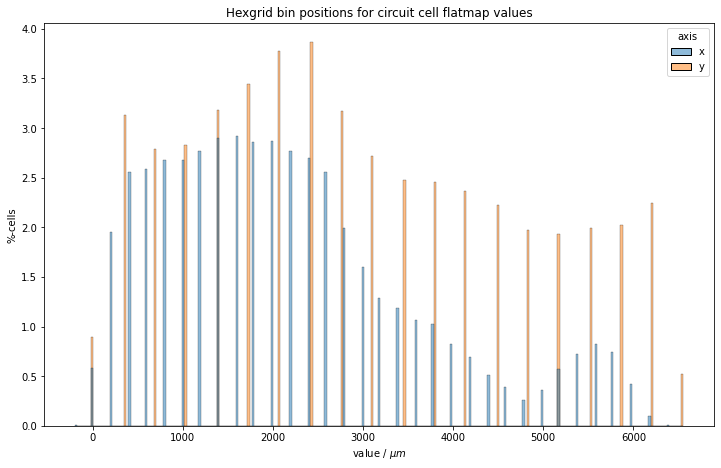

In [13]:
subtarget_positions = (pd.concat([subtargets_long.flat_x, subtargets_long.flat_y],
                                axis=0, keys=["x", "y"], names=["axis"])
                      .rename("value"))
GOLDEN = (1. + np.sqrt(5)) / 2.
figure = plt.figure(figsize=(12, 12 / GOLDEN))
axes = figure.add_subplot(111, aspect="auto")

axes = sbn.histplot(subtarget_positions.reset_index(), x="value",
                    hue="axis", stat="percent")
_=axes.set_xlabel("value / $\mu m$")
_=axes.set_ylabel("%-cells")
_=axes.set_title("Hexgrid bin positions for circuit cell flatmap values")

We can get *flatmapped* positions using the *flatmap_utility*.

In [22]:
from flatmap_utility import subtargets as fmst
from flatmap_utility import tessellate

In [5]:
reload(fmst)
xys = fmst.fmap_positions(in_data=circuit)
LOG.info("Obtained %s flatmap positions for the circuit", xys.shape)

/gpfs/bbp.cscs.ch/home/sood/rsynced/work/project/proj83/topological-analysis-of-subvolumes/flatmap_utility/flatmap_utility.py:160: UserWarning: Optimal rotation is not uniquely or poorly defined for the given sets of vectors.
  res = Rotation.align_vectors(vtgt, vv)


Rotation errors: min: 0.0, median: 0.09387602600937471, mean: 0.136282418448154, std: 0.15664142313801505, max: 2.0


2021-11-07 22:06:17 INFO     Obtained (3979592, 2) flatmap positions for the circuit


In [23]:
reload(tessellate)
tritille = tessellate.TriTille(230.)

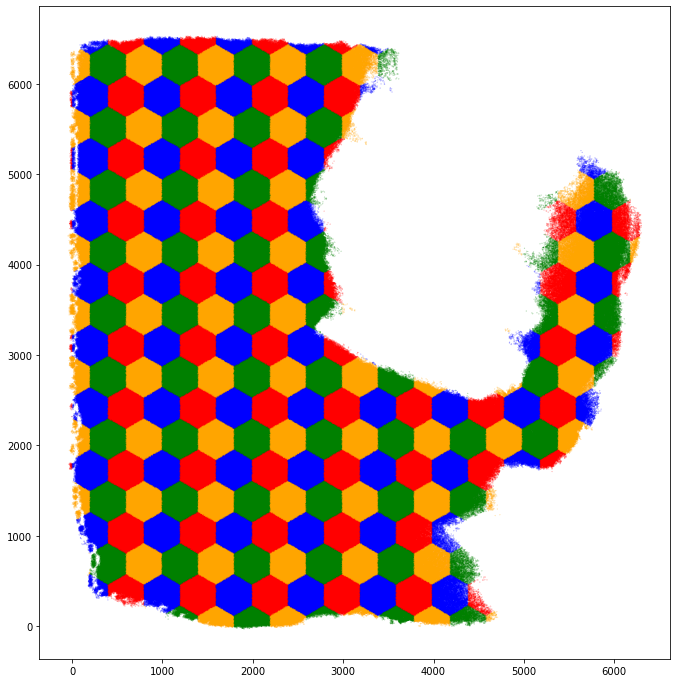

In [20]:
figure = plt.figure(figsize=(12, 12))
axes = figure.add_subplot(111, aspect=1.)
#graphic = tritille.display(7000., graphic=(figure, axes))
graphic = tritille.plot_hextiles(xys, graphic=(figure, axes),
                                 annotate=False, with_grid=False,
                                 pointmarker='.', pointmarkersize=0.05)

In [11]:
subtargets_long.head()

,subtarget,i,j,gid,x_x,y_x,x_y,y_y,circuit
0,R19;C0,-28,29,2298632,199.185843,6555.0,122.908529,6379.121117,Bio_M
1,R19;C0,-28,29,2374606,199.185843,6555.0,113.006796,6380.915472,Bio_M
2,R19;C0,-28,29,2544565,199.185843,6555.0,102.944170,6382.970460,Bio_M
3,R19;C0,-28,29,2699902,199.185843,6555.0,100.676369,6385.292113,Bio_M
4,R19;C0,-28,29,2851646,199.185843,6555.0,100.992072,6387.803372,Bio_M


In [12]:
subtargets_long.head()

,subtarget,i,j,gid,flat_x,flat_y,x,y,circuit
0,R19;C0,-28,29,2298632,199.185843,6555.0,122.908529,6379.121117,Bio_M
1,R19;C0,-28,29,2374606,199.185843,6555.0,113.006796,6380.915472,Bio_M
2,R19;C0,-28,29,2544565,199.185843,6555.0,102.944170,6382.970460,Bio_M
3,R19;C0,-28,29,2699902,199.185843,6555.0,100.676369,6385.292113,Bio_M
4,R19;C0,-28,29,2851646,199.185843,6555.0,100.992072,6387.803372,Bio_M


In [15]:
#reload(define_subtargets)
subtargets.head()

circuit  subtarget  flat_x       flat_y
Bio_M    R0;C10     3983.716857  0.0       [25570, 138130, 373015, 443541, 476759, 528746...
         R0;C11     4382.088543  0.0       [3051227, 3103620, 26297, 31573, 77692, 79728,...
         R0;C12     4780.460229  0.0       [2963907, 346904, 3133187, 29114, 260183, 3197...
         R0;C2      796.743371   0.0                    [1308142, 1328899, 1452041, 2073908]
         R0;C3      1195.115057  0.0       [840207, 1201472, 1895664, 681853, 778862, 780...
Name: gids, dtype: object

In [17]:
fpos = (subtargets.apply(len).rename("number").reset_index()
       .rename(columns={"flat_x": "x", "flat_y": "y"})
       .set_index(["circuit", "subtarget"]))
fpos.head()

x    y  number
circuit subtarget                          
Bio_M   R0;C10     3983.716857  0.0    6719
        R0;C11     4382.088543  0.0    3291
        R0;C12     4780.460229  0.0     186
        R0;C2       796.743371  0.0       4
        R0;C3      1195.115057  0.0    2556

In [18]:
import matplotlib as mpl
   
norm = mpl.colors.Normalize(vmin=0, vmax=2)
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.viridis)

rgbas = (fpos.number / 30000).apply(cmap.to_rgba)
rgbas.head()

circuit  subtarget
Bio_M    R0;C10       (0.281412, 0.155834, 0.469201, 1.0)
         R0;C11        (0.281446, 0.08432, 0.407414, 1.0)
         R0;C12       (0.267004, 0.004874, 0.329415, 1.0)
         R0;C2        (0.267004, 0.004874, 0.329415, 1.0)
         R0;C3        (0.278791, 0.062145, 0.386592, 1.0)
Name: number, dtype: object

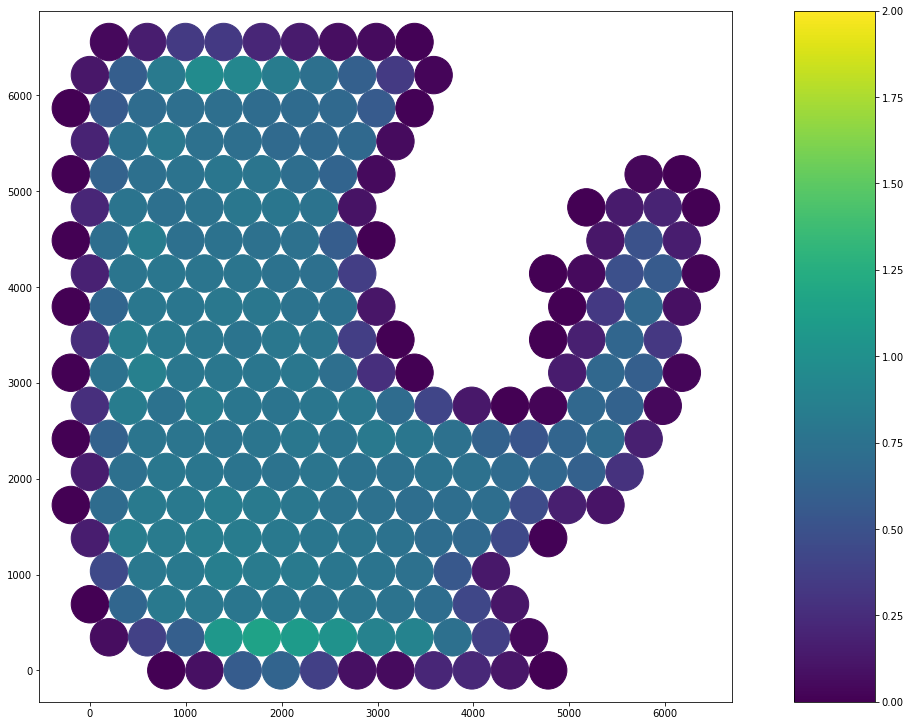

In [24]:
figure = plt.figure(figsize=(15, 12))
axes = figure.add_subplot(111, aspect=1.)
    
graphic = (figure, axes)
graphic = tritille.plot_hextiles(fpos[["x", "y"]], graphic=graphic,
                                 annotate=False, with_grid=False,
                                 pointmarker="o", pointcolor=rgbas.values,
                                 pointmarkersize=(1400*fpos.number.mean()
                                 / fpos.number.mean()))


plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
cax = plt.axes([0.84, 0.1, 0.075, 0.8])
cbar = figure.colorbar(cmap, cax=cax)

plt.show()